In [1]:
import pandas as pd
import numpy as np
from utils import *

# text preprocessing
from nltk import word_tokenize, TweetTokenizer, sent_tokenize, RegexpTokenizer
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
import gensim
from gensim.models import CoherenceModel
import pyLDAvis.gensim
from sklearn.decomposition import LatentDirichletAllocation

# plots and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

# feature extraction / vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

# save and load a file
import pickle

In [2]:
parent_path = '/Users/chenjianyu/Library/Mobile Documents/com~apple~CloudDocs/SMU/SMU Module Materials/Y2S2/SMT203 Computational Social Sci/Covid-19-Singapore-Analysis'

os.environ.update({'MALLET_HOME':r'/Users/chenjianyu/NLP_Text_Processing/mallet-2.0.8'})
mallet_path = r'/Users/chenjianyu/NLP_Text_Processing/mallet-2.0.8/bin/mallet' #update this path

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [3]:
social_media_data_folder_paths = [
    f'{parent_path}/Data/Hardwarezone Data/Cleaned Data', 
    f'{parent_path}/Data/Twitter Data/Cleaned Data/Policies/Combined',
    f'{parent_path}/Data/Facebook Data/Cleaned Data/Policies/Combined',
    f'{parent_path}/Data/Instagram Data/Cleaned Data/Policies/Combined',
    f'{parent_path}/Data/Reddit Data/Cleaned Data/Policies/Combined',
]

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Train emotions classifier

In [4]:
df_train = pd.read_csv('data/data_train.csv')
df_test = pd.read_csv('data/data_test.csv')

X_train = df_train.Text
X_test = df_test.Text

y_train = df_train.Emotion
y_test = df_test.Emotion

class_names = ['joy', 'sadness', 'anger', 'neutral', 'fear']
data = pd.concat([df_train, df_test])

# print('size of training set: %s' % (len(df_train['Text'])))
# print('size of validation set: %s' % (len(df_test['Text'])))
# print(data.Emotion.value_counts())

# data.head()

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
def preprocess_and_tokenize(data):    

    #remove html markup
    data = re.sub("(<.*?>)", "", data)

    #remove urls
    data = re.sub(r'http\S+', '', data)
    
    #remove hashtags and @names
    data= re.sub(r"(#[\d\w\.]+)", '', data)
    data= re.sub(r"(@[\d\w\.]+)", '', data)

    #remove punctuation and non-ascii digits
    data = re.sub("(\\W|\\d)", " ", data)
    
    #remove whitespace
    data = data.strip()
    
    # tokenization with nltk
    data = word_tokenize(data)
    
    # stemming with nltk
    porter = PorterStemmer()
    stem_data = [porter.stem(word) for word in data]
        
    return stem_data

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
# TFIDF, unigrams and bigrams
vect = TfidfVectorizer(tokenizer=preprocess_and_tokenize, sublinear_tf=True, norm='l2', ngram_range=(1, 2))

# fit on our complete corpus
vect.fit_transform(data.Text)

# transform testing and training datasets to vectors
X_train_vect = vect.transform(X_train)
X_test_vect = vect.transform(X_test)

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
svc = LinearSVC(tol=1e-05)
svc.fit(X_train_vect, y_train)

svm_pred = svc.predict(X_test_vect)

# print("Accuracy: {:.2f}%".format(accuracy_score(y_test, ysvm_pred) * 100))
# print("\nF1 Score: {:.2f}".format(f1_score(y_test, ysvm_pred, average='micro') * 100))
# print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, ysvm_pred))

# plot_confusion_matrix(y_test, ysvm_pred, classes=class_names, normalize=True, title='Normalized confusion matrix')
# plt.show()

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [8]:
svm_model = Pipeline([('tfidf', vect),('clf', svc),])

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
emotions_clf_filename = 'tfidf_svm.sav'
pickle.dump(svm_model, open(emotions_clf_filename, 'wb'))

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [10]:
emotions_clf = pickle.load(open('tfidf_svm.sav', 'rb'))

message = 'delivery was hour late and my pizza is cold!' 
emotions_clf.predict([message])

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array(['anger'], dtype=object)

# Define functions

In [11]:
# pos_tags = ['JJ', 'JJR', 'JJS', 'NN', 'NNS', 'NNP', 'NNPS']
# 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'
def corpus2docs_1(df):
    docs1 = [TweetTokenizer().tokenize(comment) for comment in df['Sentences']]
    # for i, comment in enumerate(docs1):
    #     tags = nltk.pos_tag(comment)
    #     docs_tags = [tag[0].lower() for tag in tags if tag[1] in pos_tags]
    #     docs1[i] = docs_tags
    docs2 = [[w.lower() for w in doc] for doc in docs1]
    docs3 = [[w for w in doc if re.search('^[a-z]+$', w)] for doc in docs1]
    docs4 = [[w for w in doc if w not in stop_list] for doc in docs3]
    return docs4

def docs2vecs(docs, dic):
    vecs = [dic.doc2bow(doc) for doc in docs]
    return vecs

stop_list = nltk.corpus.stopwords.words('english')

def get_pyLDAvis(model, vecs, dic, topic):
    pyLDAvis.enable_notebook()
    visual= pyLDAvis.gensim.prepare(lda_model, vecs, dic)
    pyLDAvis.save_html(visual, f"{topic}_viz.html")
    return lda_model.show_topics(num_topics, top_words)

def lda_model_show_topics(num_topics):
    for i in range(num_topics):
        print('-'*100)
        print(i)
        print('-'*100)
        print()

def format_topics_sentences(ldamodel, corpus, data, opinions):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(data)
    ori_sentences = opinions['Sentences']
    sent_topics_df = pd.concat([sent_topics_df, contents, ori_sentences], axis=1)
    return(sent_topics_df)

def sent_tokenize_then_to_df(df):
    sentences_dict = {'Sentences': [], 'Comment Datetime': []}

    for i, row in df.iterrows():
        sentences = sent_tokenize(df['Comments'].iloc[i])
        for sent in sentences:
            sentences_dict['Sentences'].append(sent)
            sentences_dict['Comment Datetime'].append(df['Comment Datetime'].iloc[i])

    final_df = pd.DataFrame(sentences_dict)
    final_df.drop_duplicates(subset=['Sentences'], inplace=True)
    final_df.reset_index(inplace=True)
    return final_df

def get_opinions(df):
    return df[df['Textblob_subjectivity_score'] >= 0.5]

def classify_emotions(df):
    emotions = []
    for row in df['Sentences']:
        emotion = emotions_clf.predict([row])
        emotions.append(emotion[0])
    df['Emotions'] = emotions
    return df

def coherence_plot(coherence_values):
    x = range(2, 20, 1)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Policy: Circuit Breaker

## Processing into different dataframes (extracting subjectivity, polarity, emotions)

In [12]:
cb_df = get_policy_data('circuit breaker', social_media_data_folder_paths)

True
True
True
True
True
/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
cb_valuable_comments = get_valuable_comments(cb_df)
cb_valuable_comments.reset_index(inplace=True)

cb_actionable_comments = get_actionable_comments(cb_df)
cb_actionable_comments.reset_index(inplace=True)

cb_valuable_sent = sent_tokenize_then_to_df(cb_valuable_comments)
cb_actionable_sent = sent_tokenize_then_to_df(cb_actionable_comments)

cb_valuable_polarity = get_textblob_sentiment(cb_valuable_sent, 'Sentences')
cb_actionable_polarity = get_textblob_sentiment(cb_actionable_sent, 'Sentences')

cb_valuable_sentiment = get_vader_sentiment(cb_valuable_polarity, 'Sentences')
cb_actionable_sentiment = get_vader_sentiment(cb_actionable_polarity, 'Sentences')

cb_valuable_emotions = classify_emotions(cb_valuable_sentiment)
cb_actionable_emotions = classify_emotions(cb_actionable_sentiment)

cb_valuable_opinions = get_opinions(cb_valuable_emotions)
cb_actionable_opinions = get_opinions(cb_actionable_emotions)

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [42]:
cb_val_pos_opinions =     cb_valuable_opinions[cb_valuable_opinions['Vader_compound_score'] >= 0.1]
cb_val_neg_opinions =     cb_valuable_opinions[cb_valuable_opinions['Vader_compound_score'] <= -0.1]
cb_val_anger_opinions =   cb_valuable_opinions[cb_valuable_opinions['Emotions'] <= 'anger']
cb_val_joy_opinions =     cb_valuable_opinions[cb_valuable_opinions['Emotions'] <= 'joy']
cb_val_sadness_opinions = cb_valuable_opinions[cb_valuable_opinions['Emotions'] <= 'sadness']
cb_val_fear_opinions =    cb_valuable_opinions[cb_valuable_opinions['Emotions'] <= 'fear']
cb_val_neutral_opinions = cb_valuable_opinions[cb_valuable_opinions['Emotions'] <= 'neutral']

opinion_types = [
    cb_val_joy_opinions,
    cb_val_anger_opinions,
    cb_val_sadness_opinions, 
    cb_val_fear_opinions,
    cb_val_neutral_opinions,
    cb_val_pos_opinions, 
    cb_val_neg_opinions]

for i in range(len(opinion_types)):
    opinion_types[i].reset_index(inplace=True)

opinion_counts = list(map(lambda x: len(x), opinion_types))
opinion_counts

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[2789, 1089, 4418, 2040, 3782, 2131, 1246]

## Topic Modelling (Circuit Breaker)

In [36]:
dictionary = {
    'joy': {},
    'anger': {}, 
    'sadness': {}, 
    'fear': {}, 
    'neutral': {},
    'positive': {}, 
    'negative': {}
}

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
sequence = ['joy', 'anger', 'sadness', 'fear', 'neutral', 'positive', 'negative']
index = 0

for opinion in opinion_types:
    opi_type = sequence[index]
    opinions_docs = corpus2docs_1(opinion)
    dictionary[opi_type]['opinions_doc'] = opinions_docs
    opinions_dic = gensim.corpora.Dictionary(opinions_docs)
    dictionary[opi_type]['opinions_dic'] = opinions_dic
    opinions_vecs = docs2vecs(opinions_docs, opinions_dic)
    dictionary[opi_type]['opinions_vec'] = opinions_vecs

    model_list = []
    coherence_values = []
    model_topics = []

    for num_topics in range(2, 20):
        # lda_gensim = gensim.models.ldamodel.LdaModel(corpus=cb_opinions_vecs, id2word=cb_opinions_dic, num_topics=num_topics, random_state=99, iterations=100)
        lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, iterations=500, corpus=opinions_vecs, num_topics=num_topics, id2word=opinions_dic, random_seed=99)
        coherencemodel = CoherenceModel(model=lda_mallet, texts=opinions_docs, dictionary=opinions_dic, coherence='c_v')
        model_topics.append(num_topics)
        model_list.append(lda_mallet)
        coherence_values.append(coherencemodel.get_coherence())
        # print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))
        print(num_topics)
    
    dictionary[opi_type]['model_list'] = model_list
    dictionary[opi_type]['coherence_values'] = coherence_values
    dictionary[opi_type]['model_topics'] = model_topics

    index += 1
    print(f'{opi_type} opinions is done!')

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
joy opinions is done!
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
anger opinions is done!
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
sadness opinions is done!
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
fear opinions is done!
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
neutral opinions is done!
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
positive opinions is done!
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
negative opinions is done!


/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
joy
----------


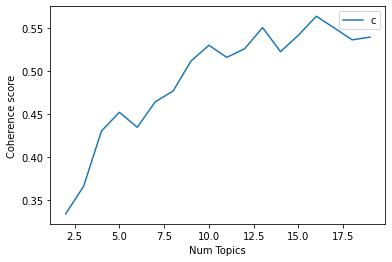


anger
----------


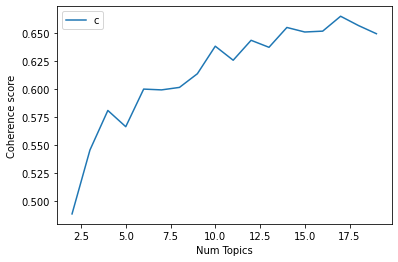


sadness
----------


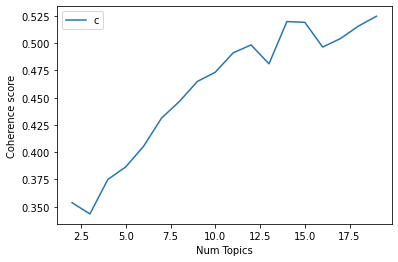


fear
----------


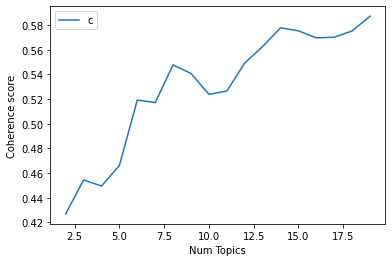


neutral
----------


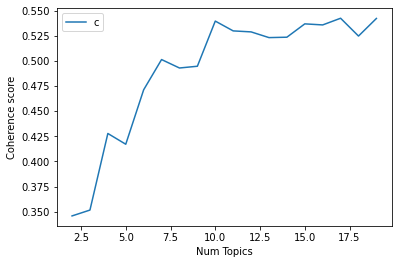


positive
----------


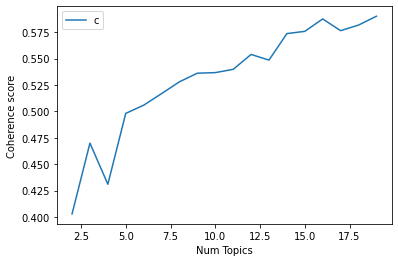


negative
----------


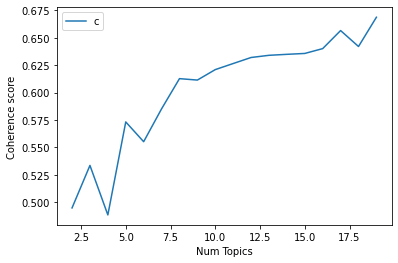

In [41]:
sequence = ['joy', 'anger', 'sadness', 'fear', 'neutral', 'positive', 'negative']

for ele in sequence:
    print(ele)
    print('-'*10)
    coherence_plot(dictionary[ele]['coherence_values'])
    print()

In [42]:
sequence = ['joy', 'anger', 'sadness', 'fear', 'neutral', 'positive', 'negative']
no_topics = [10, 10, 12, 8, 10, 9, 8] #update this after looking at all the coherence plots

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
for i in range(len(sequence)):
    opi_type = sequence[i]
    lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=dictionary[opi_type]['opinions_vec'], iterations=500, num_topics=no_topics[i], id2word=dictionary[opi_type]['opinions_dic'], random_seed=99)
    dictionary[opi_type]['lda_mallet'] = lda_mallet

    mallet_lda_model= gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda_mallet)
    dictionary[opi_type]['mallet_lda_model'] = mallet_lda_model

    df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_mallet, corpus=dictionary[opi_type]['opinions_vec'], data=dictionary[opi_type]['opinions_doc'], opinions=opinion_types[i])
    dominant_topic = df_topic_sents_keywords.reset_index()
    dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Processed Text', 'Original Text']
    # dominant_topic.head()
    dictionary[opi_type]['dominant_topic'] = dominant_topic

    topics = {}
    for j in range(dominant_topic['Dominant_Topic'].nunique()):
        topics[f'topic {j}'] = {'Text': [], 'Perc Contrib': []}
        top_text = list(dominant_topic[dominant_topic['Dominant_Topic'] == j].sort_values(['Topic_Perc_Contrib'], ascending=False)['Original Text'].head())
        top_perc_contrib = list(dominant_topic[dominant_topic['Dominant_Topic'] == j].sort_values(['Topic_Perc_Contrib'], ascending=False)['Topic_Perc_Contrib'].head())
        for k in range(5):
            topics[f'topic {j}']['Text'].append(top_text[k])
            topics[f'topic {j}']['Perc Contrib'].append(top_perc_contrib[k])
    dictionary[opi_type]['topics_top_sent'] = topics

    print(f'Round {i} is done!')

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Round 0 is done!
Round 1 is done!
Round 2 is done!
Round 3 is done!
Round 4 is done!
Round 5 is done!
Round 6 is done!


In [44]:
pickle.dump(dictionary, open("circuit_breaker_sentiments.sav", 'wb'))
cb_dict = pickle.load(open('circuit_breaker_sentiments.sav', 'rb'))

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
# cb_joy_topic0 = pd.DataFrame(cb_dict['joy']['topics_top_sent']['topic 0'])
# for row in cb_joy_topic0['Text']:
#     print(row)
#     print()

for k, v in cb_dict['joy']['topics_top_sent'].items():
    print(k)
    for i in v['Text']:
        print(i)
        print()
    print('-'*100)

topic 0
I hope all is well in singapore and the bad news is overcome by good media coverage ,we somehow need good news to over come the bad news ,the key to observation has always been positive when it contributes to a good community spirit .

Many countries are adopting the 'wait till the cockroaches eventually start crawling out n resting on the bed' approach then their health care will then begin to deal with it and buying time for vaccines to intervene in due course..Our infected figures will be alarming for sure since with such aggressive testing but if our medical and MOH facilities and resources are able to substain then it is definitely a good move in a longer term so that even the vaccines will not be out this year we can still contain it .

The cautious approach is good if we really want to smash the curve but not allowing visitations to the significant other is such a weird move to make.

Since we are doing something about it, do try to do all to prevent Singapore becoming "

## Topic Modelling (Circuit Breaker: Valuable Comments)

In [44]:
opinions_docs = corpus2docs_1(cb_val_joy_opinions)
opinions_dic = gensim.corpora.Dictionary(opinions_docs)
opinions_vecs = docs2vecs(opinions_docs, opinions_dic)

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [46]:
model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 20):
    # lda_gensim = gensim.models.ldamodel.LdaModel(corpus=cb_opinions_vecs, id2word=cb_opinions_dic, num_topics=num_topics, random_state=99, iterations=100)
    lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, iterations=500, corpus=opinions_vecs, num_topics=num_topics, id2word=opinions_dic, random_seed=99, alpha=0.1)
    coherencemodel = CoherenceModel(model=lda_mallet, texts=opinions_docs, dictionary=opinions_dic, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(lda_mallet)
    coherence_values.append(coherencemodel.get_coherence())
    # print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))
    print(num_topics)

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


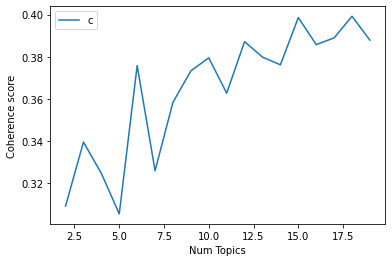

In [47]:
coherence_plot(coherence_values)

In [48]:
lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=opinions_vecs, iterations=500, num_topics=6, id2word=opinions_dic, random_seed=99, alpha=0.1)
mallet_lda_model= gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda_mallet)

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_mallet, corpus=opinions_vecs, data=opinions_docs, opinions=cb_actionable_opinions)
dominant_topic = df_topic_sents_keywords.reset_index()
dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Processed Text', 'Original Text']
dominant_topic.head()

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Processed Text,Original Text
0,0,1.0,0.4747,"virus, people, safe, stay, home, government, h...","[wrote, need, handle, issues, home, work, pare...",Most of them enjoy they coffee n tea in aftern...
1,1,1.0,0.8042,"virus, people, safe, stay, home, government, h...","[retired, parents, wife, keep, asking, help, n...","For electricity, use lesser aircon should be o..."
2,2,3.0,0.9499,"people, parents, time, home, good, safe, cases...","[electricity, use, lesser, aircon, ok, bills, ...","For me, I'm lucky the company already are usin..."
3,3,4.0,0.9807,"home, good, time, people, work, safe, measures...","[lucky, company, already, using, virtual, call...","Too bad, many people spoil market."
4,4,2.0,0.9925,"people, circuit, breaker, work, time, make, go...","[way, agree, also, bored, leh, every, day, hom...",Wtf is Hong Kong doing?


In [49]:
vecTop= lda_mallet.show_topics(num_words=20)
for i in range(0, 6):
    print(vecTop[i])

(0, '0.023*"people" + 0.011*"mask" + 0.010*"cases" + 0.009*"masks" + 0.009*"infected" + 0.008*"person" + 0.008*"school" + 0.008*"virus" + 0.007*"wear" + 0.006*"wearing" + 0.006*"lockdown" + 0.006*"taking" + 0.005*"number" + 0.005*"test" + 0.005*"risk" + 0.005*"morning" + 0.005*"family" + 0.005*"children" + 0.005*"rate" + 0.004*"infection"')
(1, '0.021*"virus" + 0.015*"people" + 0.013*"safe" + 0.010*"stay" + 0.010*"home" + 0.008*"government" + 0.008*"healthy" + 0.007*"work" + 0.006*"spread" + 0.006*"vulnerable" + 0.006*"contact" + 0.006*"measures" + 0.005*"hard" + 0.005*"put" + 0.005*"infected" + 0.005*"asymptomatic" + 0.005*"outbreak" + 0.005*"patients" + 0.005*"period" + 0.005*"good"')
(2, '0.028*"people" + 0.010*"circuit" + 0.010*"breaker" + 0.009*"work" + 0.008*"time" + 0.007*"make" + 0.007*"lockdown" + 0.007*"home" + 0.007*"govt" + 0.006*"fucking" + 0.006*"end" + 0.006*"stupid" + 0.006*"government" + 0.006*"things" + 0.006*"measures" + 0.006*"understand" + 0.006*"made" + 0.006*"idi

In [50]:
pyLDAvis.enable_notebook()
visual= pyLDAvis.gensim.prepare(mallet_lda_model, opinions_vecs, opinions_dic)
pyLDAvis.save_html(visual, f"cb_valuable_joy_viz.html")

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:236: RuntimeWarning: divide by zero encountered in log
  log_1 = np.log(pd.eval("(topic_given_term.T / topic_proportion)"))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:259: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(pd.eval("topic_term_dists / term_proportion")).astype("float64")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:260: RuntimeWarning: divide by zero encountered in log
  log_t

### Anger

In [51]:
opinions_docs = corpus2docs_1(cb_val_anger_opinions)
opinions_dic = gensim.corpora.Dictionary(opinions_docs)
opinions_vecs = docs2vecs(opinions_docs, opinions_dic)

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 20):
    # lda_gensim = gensim.models.ldamodel.LdaModel(corpus=cb_opinions_vecs, id2word=cb_opinions_dic, num_topics=num_topics, random_state=99, iterations=100)
    lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, iterations=500, corpus=opinions_vecs, num_topics=num_topics, id2word=opinions_dic, random_seed=99, alpha=0.1)
    coherencemodel = CoherenceModel(model=lda_mallet, texts=opinions_docs, dictionary=opinions_dic, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(lda_mallet)
    coherence_values.append(coherencemodel.get_coherence())
    # print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))
    print(num_topics)

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


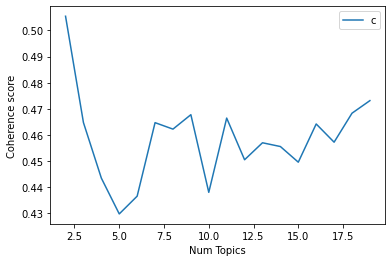

In [53]:
coherence_plot(coherence_values)

In [54]:
lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=opinions_vecs, iterations=500, num_topics=6, id2word=opinions_dic, random_seed=99, alpha=0.1)
mallet_lda_model= gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda_mallet)

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_mallet, corpus=opinions_vecs, data=opinions_docs, opinions=cb_actionable_opinions)
dominant_topic = df_topic_sents_keywords.reset_index()
dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Processed Text', 'Original Text']
dominant_topic.head()

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Processed Text,Original Text
0,0,2.0,0.9863,"people, food, mask, workers, great, leaders, t...","[electricity, use, lesser, aircon, ok, bills, ...",Most of them enjoy they coffee n tea in aftern...
1,1,2.0,0.9587,"people, food, mask, workers, great, leaders, t...","[lucky, company, already, using, virtual, call...","For electricity, use lesser aircon should be o..."
2,2,4.0,0.5064,"people, work, government, time, home, parents,...","[cook, cheap, simple, healthy, meals, impt, ne...","For me, I'm lucky the company already are usin..."
3,3,0.0,0.9883,"people, breaker, circuit, wrong, money, virus,...","[tankgunner, wrote, think, happen, yr, far, va...","Too bad, many people spoil market."
4,4,2.0,0.9954,"people, food, mask, workers, great, leaders, t...","[voluntarily, refunded, amount, used, share, p...",Wtf is Hong Kong doing?


In [55]:
vecTop= lda_mallet.show_topics(num_words=20)
# for i in range(0, 6):
#     print(vecTop[i])

pyLDAvis.enable_notebook()
visual= pyLDAvis.gensim.prepare(mallet_lda_model, opinions_vecs, opinions_dic)
pyLDAvis.save_html(visual, f"cb_valuable_anger_viz.html")

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:236: RuntimeWarning: divide by zero encountered in log
  log_1 = np.log(pd.eval("(topic_given_term.T / topic_proportion)"))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:259: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(pd.eval("topic_term_dists / term_proportion")).astype("float64")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:260: RuntimeWarning: divide by zero encountered in log
  log_t

### All emotions/sentiments

In [12]:
cb_df = get_policy_data('circuit breaker', social_media_data_folder_paths)

cb_valuable_comments = get_valuable_comments(cb_df)
cb_valuable_comments.reset_index(inplace=True)

cb_actionable_comments = get_actionable_comments(cb_df)
cb_actionable_comments.reset_index(inplace=True)

cb_valuable_sent = sent_tokenize_then_to_df(cb_valuable_comments)
cb_actionable_sent = sent_tokenize_then_to_df(cb_actionable_comments)

cb_valuable_polarity = get_textblob_sentiment(cb_valuable_sent, 'Sentences')
cb_actionable_polarity = get_textblob_sentiment(cb_actionable_sent, 'Sentences')

cb_valuable_sentiment = get_vader_sentiment(cb_valuable_polarity, 'Sentences')
cb_actionable_sentiment = get_vader_sentiment(cb_actionable_polarity, 'Sentences')

cb_valuable_emotions = classify_emotions(cb_valuable_sentiment)
cb_actionable_emotions = classify_emotions(cb_actionable_sentiment)

cb_valuable_opinions = get_opinions(cb_valuable_emotions)
cb_actionable_opinions = get_opinions(cb_actionable_emotions)

opinions_docs = corpus2docs_1(cb_valuable_opinions)
opinions_dic = gensim.corpora.Dictionary(opinions_docs)
opinions_vecs = docs2vecs(opinions_docs, opinions_dic)

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
True
True
True
True
True


In [25]:
cb_valuable_opinions.reset_index(inplace=True)

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [13]:
model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 20):
    # lda_gensim = gensim.models.ldamodel.LdaModel(corpus=cb_opinions_vecs, id2word=cb_opinions_dic, num_topics=num_topics, random_state=99, iterations=100)
    lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, iterations=500, corpus=opinions_vecs, num_topics=num_topics, id2word=opinions_dic, random_seed=99, alpha=0.1)
    coherencemodel = CoherenceModel(model=lda_mallet, texts=opinions_docs, dictionary=opinions_dic, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(lda_mallet)
    coherence_values.append(coherencemodel.get_coherence())
    # print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))
    print(num_topics)

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


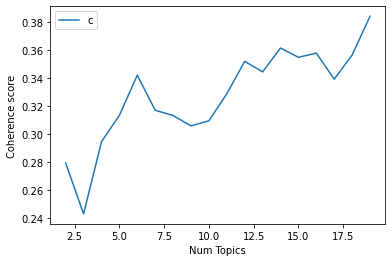

In [14]:
coherence_plot(coherence_values)

In [15]:
lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=opinions_vecs, iterations=500, num_topics=6, id2word=opinions_dic, random_seed=99, alpha=0.1)
mallet_lda_model= gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda_mallet)

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_mallet, corpus=opinions_vecs, data=opinions_docs, opinions=cb_actionable_opinions)
dominant_topic = df_topic_sents_keywords.reset_index()
dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Processed Text', 'Original Text']
dominant_topic.head()

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Processed Text,Original Text
0,0,2.0,0.9974,"home, stay, safe, time, good, parents, virus, ...","[wrote, need, handle, issues, home, work, pare...",NaN
1,1,0.0,0.1667,"people, mask, home, food, stay, open, allowed,...",[one],Most of them enjoy they coffee n tea in aftern...
2,2,2.0,0.5370,"home, stay, safe, time, good, parents, virus, ...","[home, parents, ask, help]",NaN
3,3,3.0,0.9731,"people, government, measures, good, home, hard...","[mean, work, office, miracoulsly, need]",NaN
4,4,2.0,0.8817,"home, stay, safe, time, good, parents, virus, ...","[wrote, need, handle, issues, home, work, pare...","For electricity, use lesser aircon should be o..."


In [16]:
vecTop= lda_mallet.show_topics(num_words=20)
# for i in range(0, 6):
#     print(vecTop[i])

pyLDAvis.enable_notebook()
visual= pyLDAvis.gensim.prepare(mallet_lda_model, opinions_vecs, opinions_dic)
pyLDAvis.save_html(visual, f"cb_valuable_total_high_viz.html")

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:236: RuntimeWarning: divide by zero encountered in log
  log_1 = np.log(pd.eval("(topic_given_term.T / topic_proportion)"))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:259: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(pd.eval("topic_term_dists / term_proportion")).astype("float64")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:260: RuntimeWarning: divide by zero encountered in log
  log_t

In [26]:
def format_topics_sentences(ldamodel, corpus, data, ori_data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(data)
    ori_text = ori_data['Sentences']
    sent_topics_df = pd.concat([sent_topics_df, contents, ori_text], axis=1)
    return(sent_topics_df)

#df_topic_sents_keywords = format_topics_sentences(ldamodel=model_list[1], corpus=sg_vecs, data=sg_docs)
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_mallet, corpus=opinions_vecs, data=opinions_docs, ori_data=cb_valuable_opinions)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Tokenized Text', 'Original Text']

# Show
df_dominant_topic.head()

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Tokenized Text,Original Text
0,0,2.0,0.9974,"home, stay, safe, time, good, parents, virus, ...","[wrote, need, handle, issues, home, work, pare...",kuma-mon wrote: Because need to handle issues ...
1,1,0.0,0.1667,"people, mask, home, food, stay, open, allowed,...",[one],You are not the only one.
2,2,2.0,0.5370,"home, stay, safe, time, good, parents, virus, ...","[home, parents, ask, help]",1 - why at home only parents will ask help?
3,3,3.0,0.9731,"people, government, measures, good, home, hard...","[mean, work, office, miracoulsly, need]",You mean if work in office they miracoulsly no...
4,4,2.0,0.8817,"home, stay, safe, time, good, parents, virus, ...","[wrote, need, handle, issues, home, work, pare...",kuma-mon wrote: Because need to handle issues ...


## Topic Modelling (Circuit Breaker: Actionable Comments)

In [21]:
cb_actionable_opinions.reset_index(inplace=True)

opinions_docs = corpus2docs_1(cb_actionable_opinions)
opinions_dic = gensim.corpora.Dictionary(opinions_docs)
opinions_vecs = docs2vecs(opinions_docs, opinions_dic)

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [36]:
model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 20):
    # lda_gensim = gensim.models.ldamodel.LdaModel(corpus=cb_opinions_vecs, id2word=cb_opinions_dic, num_topics=num_topics, random_state=99, iterations=100)
    lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, iterations=500, corpus=opinions_vecs, num_topics=num_topics, id2word=opinions_dic, random_seed=99, alpha=0.1)
    coherencemodel = CoherenceModel(model=lda_mallet, texts=opinions_docs, dictionary=opinions_dic, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(lda_mallet)
    coherence_values.append(coherencemodel.get_coherence())
    # print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))
    print(num_topics)

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


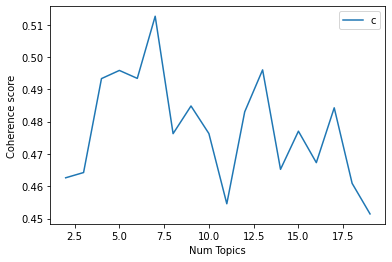

In [37]:
coherence_plot(coherence_values)

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


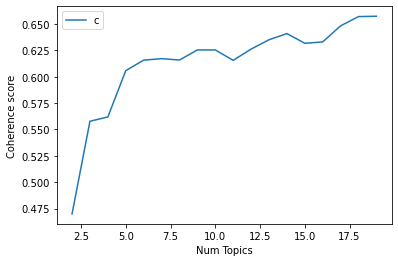

In [17]:
coherence_plot(coherence_values)

In [38]:
lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=opinions_vecs, iterations=500, num_topics=6, id2word=opinions_dic, random_seed=99, alpha=0.1)
mallet_lda_model= gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda_mallet)

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_mallet, corpus=opinions_vecs, data=opinions_docs, opinions=cb_actionable_opinions)
dominant_topic = df_topic_sents_keywords.reset_index()
dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Processed Text', 'Original Text']
dominant_topic.head()

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Processed Text,Original Text
0,0,3.0,0.7876,"people, good, full, market, problem, lockdown,...","[enjoy, coffee, n, tea, afternoon, work]",Most of them enjoy they coffee n tea in aftern...
1,1,4.0,0.9863,"family, people, person, time, infected, friend...","[electricity, use, lesser, aircon, ok, bills, ...","For electricity, use lesser aircon should be o..."
2,2,2.0,0.9477,"people, quarantine, work, wrong, responsible, ...","[lucky, company, already, using, virtual, call...","For me, I'm lucky the company already are usin..."
3,3,3.0,0.9797,"people, good, full, market, problem, lockdown,...","[bad, many, people, spoil, market]","Too bad, many people spoil market."
4,4,0.0,0.1667,"home, stay, people, safe, school, lockdown, co...",[],Wtf is Hong Kong doing?


In [34]:
vecTop= lda_mallet.show_topics(num_words=20)
for i in range(0, 4):
    print(vecTop[i])

(0, '0.018*"cases" + 0.013*"people" + 0.011*"home" + 0.009*"measures" + 0.009*"virus" + 0.009*"health" + 0.008*"good" + 0.008*"safe" + 0.008*"government" + 0.007*"stay" + 0.007*"continue" + 0.007*"school" + 0.007*"community" + 0.007*"schools" + 0.007*"open" + 0.007*"time" + 0.006*"parents" + 0.006*"breaker" + 0.006*"circuit" + 0.006*"important"')
(1, '0.021*"people" + 0.015*"mask" + 0.012*"virus" + 0.011*"wear" + 0.011*"measures" + 0.011*"masks" + 0.010*"government" + 0.007*"wearing" + 0.007*"essential" + 0.007*"time" + 0.006*"safe" + 0.006*"fine" + 0.006*"sick" + 0.006*"free" + 0.006*"contact" + 0.006*"infected" + 0.005*"travel" + 0.005*"tough" + 0.005*"months" + 0.005*"management"')
(2, '0.020*"people" + 0.012*"wrong" + 0.009*"good" + 0.008*"making" + 0.007*"workers" + 0.006*"problem" + 0.006*"family" + 0.006*"pandemic" + 0.006*"country" + 0.006*"late" + 0.006*"understand" + 0.006*"staff" + 0.005*"coming" + 0.005*"test" + 0.005*"decision" + 0.005*"longer" + 0.005*"make" + 0.005*"prou

In [39]:
vecTop= lda_mallet.show_topics(num_words=20)
for i in range(0, 6):
    print(vecTop[i])

(0, '0.026*"home" + 0.022*"stay" + 0.021*"people" + 0.012*"safe" + 0.012*"school" + 0.010*"lockdown" + 0.010*"continue" + 0.009*"parents" + 0.009*"children" + 0.008*"cases" + 0.007*"schools" + 0.007*"open" + 0.007*"make" + 0.007*"close" + 0.007*"allowed" + 0.007*"case" + 0.007*"time" + 0.007*"long" + 0.007*"positive" + 0.006*"young"')
(1, '0.036*"people" + 0.022*"government" + 0.017*"safe" + 0.015*"good" + 0.014*"distancing" + 0.010*"wrong" + 0.009*"make" + 0.009*"feel" + 0.009*"workers" + 0.009*"virus" + 0.008*"pandemic" + 0.008*"work" + 0.008*"country" + 0.007*"fine" + 0.007*"money" + 0.007*"understand" + 0.007*"phase" + 0.007*"infected" + 0.007*"decision" + 0.007*"place"')
(2, '0.021*"people" + 0.011*"quarantine" + 0.009*"work" + 0.008*"staff" + 0.008*"wrong" + 0.008*"responsible" + 0.008*"long" + 0.008*"health" + 0.007*"time" + 0.007*"essential" + 0.007*"give" + 0.007*"good" + 0.007*"kind" + 0.007*"country" + 0.006*"home" + 0.006*"things" + 0.006*"days" + 0.005*"part" + 0.005*"vuln

In [40]:
pyLDAvis.enable_notebook()
visual= pyLDAvis.gensim.prepare(mallet_lda_model, opinions_vecs, opinions_dic)
pyLDAvis.save_html(visual, f"cb_actionable_viz.html")

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:236: RuntimeWarning: divide by zero encountered in log
  log_1 = np.log(pd.eval("(topic_given_term.T / topic_proportion)"))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:259: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(pd.eval("topic_term_dists / term_proportion")).astype("float64")
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pyLDAvis/_prepare.py:260: RuntimeWarning: divide by zero encountered in log
  log_t

# Policy: Tracetogether 

In [50]:
tracetogether_df = get_policy_data('circuit breaker', social_media_data_folder_paths)
safe_entry_df = get_policy_data('safe entry', social_media_data_folder_paths)

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
True
True
True
True
True
True
True
True
True


In [51]:
tt_df = pd.concat([tracetogether_df, safe_entry_df])

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [52]:
tt_valuable_comments = get_valuable_comments(tt_df)
tt_valuable_comments.reset_index(inplace=True)

tt_actionable_comments = get_actionable_comments(tt_df)
tt_actionable_comments.reset_index(inplace=True)

tt_valuable_sent = sent_tokenize_then_to_df(tt_valuable_comments)
tt_actionable_sent = sent_tokenize_then_to_df(tt_actionable_comments)

tt_valuable_polarity = get_textblob_sentiment(tt_valuable_sent, 'Sentences')
tt_actionable_polarity = get_textblob_sentiment(tt_actionable_sent, 'Sentences')

tt_valuable_sentiment = get_vader_sentiment(tt_valuable_polarity, 'Sentences')
tt_actionable_sentiment = get_vader_sentiment(tt_actionable_polarity, 'Sentences')

tt_valuable_emotions = classify_emotions(tt_valuable_sentiment)
tt_actionable_emotions = classify_emotions(tt_actionable_sentiment)

tt_valuable_opinions = get_opinions(tt_valuable_emotions)
tt_actionable_opinions = get_opinions(tt_actionable_emotions)

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
tt_val_pos_opinions =     tt_valuable_opinions[tt_valuable_opinions['Vader_compound_score'] >= 0.1]
tt_val_neg_opinions =     tt_valuable_opinions[tt_valuable_opinions['Vader_compound_score'] <= -0.1]
tt_val_anger_opinions =   tt_valuable_opinions[tt_valuable_opinions['Emotions'] <= 'anger']
tt_val_joy_opinions =     tt_valuable_opinions[tt_valuable_opinions['Emotions'] <= 'joy']
tt_val_sadness_opinions = tt_valuable_opinions[tt_valuable_opinions['Emotions'] <= 'sadness']
tt_val_fear_opinions =    tt_valuable_opinions[tt_valuable_opinions['Emotions'] <= 'fear']
tt_val_neutral_opinions = tt_valuable_opinions[tt_valuable_opinions['Emotions'] <= 'neutral']

opinion_types = [
    tt_val_joy_opinions,
    tt_val_anger_opinions,
    tt_val_sadness_opinions, 
    tt_val_fear_opinions,
    tt_val_neutral_opinions,
    tt_val_pos_opinions, 
    tt_val_neg_opinions]

for i in range(len(opinion_types)):
    opinion_types[i].reset_index(inplace=True)

opinion_counts = list(map(lambda x: len(x), opinion_types))

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Topic Modelling (Tracetogether)

In [54]:
tt_dictionary = {
    'joy': {},
    'anger': {}, 
    'sadness': {}, 
    'fear': {}, 
    'neutral': {},
    'positive': {}, 
    'negative': {}
}

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [59]:
sequence = ['joy', 'anger', 'sadness', 'fear', 'neutral', 'positive', 'negative']
index = 0

for opinion in opinion_types:
    opi_type = sequence[index]
    opinions_docs = corpus2docs_1(opinion)
    tt_dictionary[opi_type]['opinions_doc'] = opinions_docs
    opinions_dic = gensim.corpora.Dictionary(opinions_docs)
    tt_dictionary[opi_type]['opinions_dic'] = opinions_dic
    opinions_vecs = docs2vecs(opinions_docs, opinions_dic)
    tt_dictionary[opi_type]['opinions_vec'] = opinions_vecs

    model_list = []
    coherence_values = []
    model_topics = []

    for num_topics in range(2, 20):
        # lda_gensim = gensim.models.ldamodel.LdaModel(corpus=cb_opinions_vecs, id2word=cb_opinions_dic, num_topics=num_topics, random_state=99, iterations=100)
        lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, iterations=500, corpus=opinions_vecs, num_topics=num_topics, id2word=opinions_dic, random_seed=99)
        coherencemodel = CoherenceModel(model=lda_mallet, texts=opinions_docs, dictionary=opinions_dic, coherence='c_v')
        model_topics.append(num_topics)
        model_list.append(lda_mallet)
        coherence_values.append(coherencemodel.get_coherence())
        # print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))
        print(num_topics)
    
    tt_dictionary[opi_type]['model_list'] = model_list
    tt_dictionary[opi_type]['coherence_values'] = coherence_values
    tt_dictionary[opi_type]['model_topics'] = model_topics

    index += 1
    print(f'{opi_type} opinions is done!')

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
joy opinions is done!
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
anger opinions is done!
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
sadness opinions is done!
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
fear opinions is done!
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
neutral opinions is done!
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
positive opinions is done!
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
negative opinions is done!


/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
joy
----------


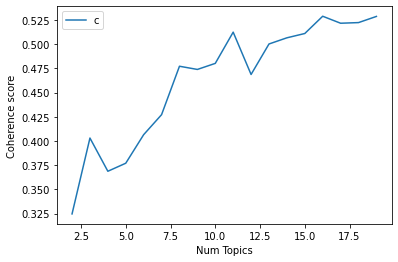


anger
----------


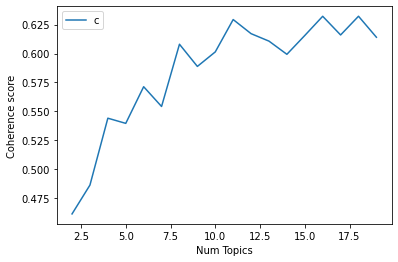


sadness
----------


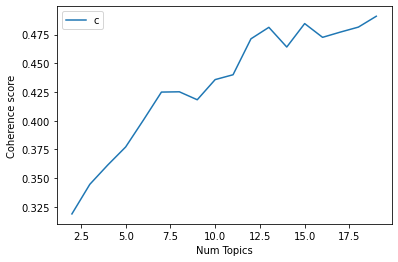


fear
----------


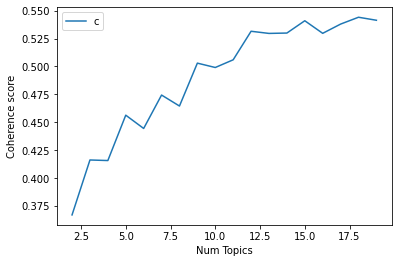


neutral
----------


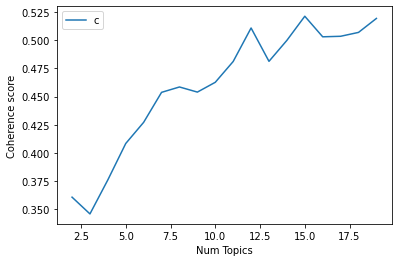


positive
----------


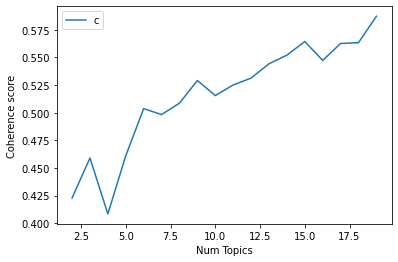


negative
----------


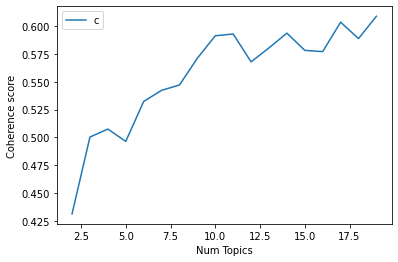

In [60]:
sequence = ['joy', 'anger', 'sadness', 'fear', 'neutral', 'positive', 'negative']

for ele in sequence:
    print(ele)
    print('-'*10)
    coherence_plot(dictionary[ele]['coherence_values'])
    print()

In [61]:
sequence = ['joy', 'anger', 'sadness', 'fear', 'neutral', 'positive', 'negative']
no_topics = [8, 8, 6, 9, 7, 6, 9] #update this after looking at all the coherence plots

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [62]:
for i in range(len(sequence)):
    opi_type = sequence[i]
    lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=tt_dictionary[opi_type]['opinions_vec'], iterations=500, num_topics=no_topics[i], id2word=tt_dictionary[opi_type]['opinions_dic'], random_seed=99)
    tt_dictionary[opi_type]['lda_mallet'] = lda_mallet

    mallet_lda_model= gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda_mallet)
    tt_dictionary[opi_type]['mallet_lda_model'] = mallet_lda_model

    df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_mallet, corpus=tt_dictionary[opi_type]['opinions_vec'], data=tt_dictionary[opi_type]['opinions_doc'], opinions=opinion_types[i])
    dominant_topic = df_topic_sents_keywords.reset_index()
    dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Processed Text', 'Original Text']
    # dominant_topic.head()
    tt_dictionary[opi_type]['dominant_topic'] = dominant_topic

    topics = {}
    for j in range(dominant_topic['Dominant_Topic'].nunique()):
        topics[f'topic {j}'] = {'Text': [], 'Perc Contrib': []}
        top_text = list(dominant_topic[dominant_topic['Dominant_Topic'] == j].sort_values(['Topic_Perc_Contrib'], ascending=False)['Original Text'].head())
        top_perc_contrib = list(dominant_topic[dominant_topic['Dominant_Topic'] == j].sort_values(['Topic_Perc_Contrib'], ascending=False)['Topic_Perc_Contrib'].head())
        for k in range(5):
            topics[f'topic {j}']['Text'].append(top_text[k])
            topics[f'topic {j}']['Perc Contrib'].append(top_perc_contrib[k])
    tt_dictionary[opi_type]['topics_top_sent'] = topics

    print(f'Round {i} is done!')

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Round 0 is done!
Round 1 is done!
Round 2 is done!
Round 3 is done!
Round 4 is done!
Round 5 is done!
Round 6 is done!


In [68]:
pickle.dump(tt_dictionary, open("tracetogether_sentiments.sav", 'wb'))
tt_dict = pickle.load(open('tracetogether_sentiments.sav', 'rb'))

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Policy: Economic Measures

In [69]:
tracetogether_df = get_policy_data('economic measures', social_media_data_folder_paths)

True
True
True
True
True
/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [70]:
tt_valuable_comments = get_valuable_comments(tt_df)
tt_valuable_comments.reset_index(inplace=True)

tt_actionable_comments = get_actionable_comments(tt_df)
tt_actionable_comments.reset_index(inplace=True)

tt_valuable_sent = sent_tokenize_then_to_df(tt_valuable_comments)
tt_actionable_sent = sent_tokenize_then_to_df(tt_actionable_comments)

tt_valuable_polarity = get_textblob_sentiment(tt_valuable_sent, 'Sentences')
tt_actionable_polarity = get_textblob_sentiment(tt_actionable_sent, 'Sentences')

tt_valuable_sentiment = get_vader_sentiment(tt_valuable_polarity, 'Sentences')
tt_actionable_sentiment = get_vader_sentiment(tt_actionable_polarity, 'Sentences')

tt_valuable_emotions = classify_emotions(tt_valuable_sentiment)
tt_actionable_emotions = classify_emotions(tt_actionable_sentiment)

tt_valuable_opinions = get_opinions(tt_valuable_emotions)
tt_actionable_opinions = get_opinions(tt_actionable_emotions)

tt_val_pos_opinions =     tt_valuable_opinions[tt_valuable_opinions['Vader_compound_score'] >= 0.1]
tt_val_neg_opinions =     tt_valuable_opinions[tt_valuable_opinions['Vader_compound_score'] <= -0.1]
tt_val_anger_opinions =   tt_valuable_opinions[tt_valuable_opinions['Emotions'] <= 'anger']
tt_val_joy_opinions =     tt_valuable_opinions[tt_valuable_opinions['Emotions'] <= 'joy']
tt_val_sadness_opinions = tt_valuable_opinions[tt_valuable_opinions['Emotions'] <= 'sadness']
tt_val_fear_opinions =    tt_valuable_opinions[tt_valuable_opinions['Emotions'] <= 'fear']
tt_val_neutral_opinions = tt_valuable_opinions[tt_valuable_opinions['Emotions'] <= 'neutral']

opinion_types = [
    tt_val_joy_opinions,
    tt_val_anger_opinions,
    tt_val_sadness_opinions, 
    tt_val_fear_opinions,
    tt_val_neutral_opinions,
    tt_val_pos_opinions, 
    tt_val_neg_opinions]

for i in range(len(opinion_types)):
    opinion_types[i].reset_index(inplace=True)

opinion_counts = list(map(lambda x: len(x), opinion_types))

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Topic Modelling (Economic Measures)

In [71]:
tt_dictionary = {
    'joy': {},
    'anger': {}, 
    'sadness': {}, 
    'fear': {}, 
    'neutral': {},
    'positive': {}, 
    'negative': {}
}

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [72]:
sequence = ['joy', 'anger', 'sadness', 'fear', 'neutral', 'positive', 'negative']
index = 0

for opinion in opinion_types:
    opi_type = sequence[index]
    opinions_docs = corpus2docs_1(opinion)
    tt_dictionary[opi_type]['opinions_doc'] = opinions_docs
    opinions_dic = gensim.corpora.Dictionary(opinions_docs)
    tt_dictionary[opi_type]['opinions_dic'] = opinions_dic
    opinions_vecs = docs2vecs(opinions_docs, opinions_dic)
    tt_dictionary[opi_type]['opinions_vec'] = opinions_vecs

    model_list = []
    coherence_values = []
    model_topics = []

    for num_topics in range(2, 20):
        # lda_gensim = gensim.models.ldamodel.LdaModel(corpus=cb_opinions_vecs, id2word=cb_opinions_dic, num_topics=num_topics, random_state=99, iterations=100)
        lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, iterations=500, corpus=opinions_vecs, num_topics=num_topics, id2word=opinions_dic, random_seed=99)
        coherencemodel = CoherenceModel(model=lda_mallet, texts=opinions_docs, dictionary=opinions_dic, coherence='c_v')
        model_topics.append(num_topics)
        model_list.append(lda_mallet)
        coherence_values.append(coherencemodel.get_coherence())
        # print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))
        print(num_topics)
    
    tt_dictionary[opi_type]['model_list'] = model_list
    tt_dictionary[opi_type]['coherence_values'] = coherence_values
    tt_dictionary[opi_type]['model_topics'] = model_topics

    index += 1
    print(f'{opi_type} opinions is done!')

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
joy opinions is done!
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
anger opinions is done!
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
sadness opinions is done!
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
fear opinions is done!
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
neutral opinions is done!
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
positive opinions is done!
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
negative opinions is done!


/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
joy
----------


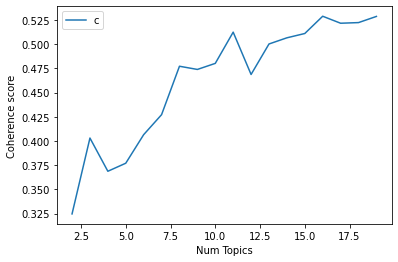


anger
----------


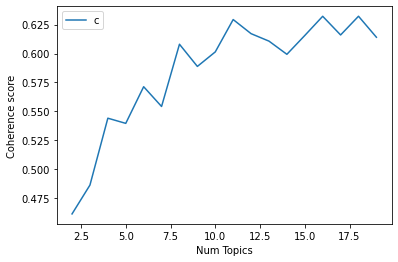


sadness
----------


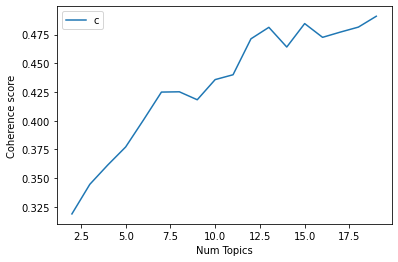


fear
----------


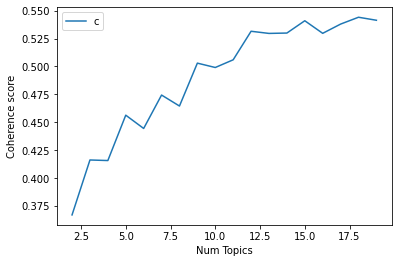


neutral
----------


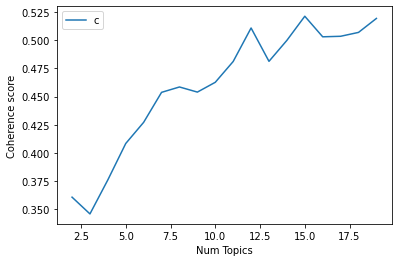


positive
----------


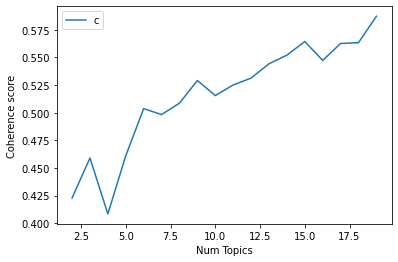


negative
----------


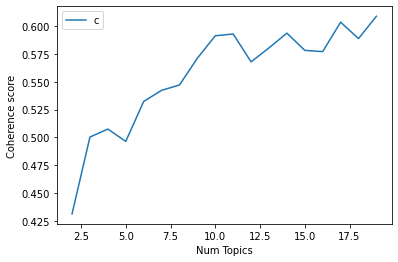

In [73]:
sequence = ['joy', 'anger', 'sadness', 'fear', 'neutral', 'positive', 'negative']

for ele in sequence:
    print(ele)
    print('-'*10)
    coherence_plot(dictionary[ele]['coherence_values'])
    print()

In [74]:
sequence = ['joy', 'anger', 'sadness', 'fear', 'neutral', 'positive', 'negative']
no_topics = [8, 6, 6, 7, 7, 6, 4] #update this after looking at all the coherence plots

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [75]:
for i in range(len(sequence)):
    opi_type = sequence[i]
    lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=tt_dictionary[opi_type]['opinions_vec'], iterations=500, num_topics=no_topics[i], id2word=tt_dictionary[opi_type]['opinions_dic'], random_seed=99)
    tt_dictionary[opi_type]['lda_mallet'] = lda_mallet

    mallet_lda_model= gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda_mallet)
    tt_dictionary[opi_type]['mallet_lda_model'] = mallet_lda_model

    df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_mallet, corpus=tt_dictionary[opi_type]['opinions_vec'], data=tt_dictionary[opi_type]['opinions_doc'], opinions=opinion_types[i])
    dominant_topic = df_topic_sents_keywords.reset_index()
    dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Processed Text', 'Original Text']
    # dominant_topic.head()
    tt_dictionary[opi_type]['dominant_topic'] = dominant_topic

    topics = {}
    for j in range(dominant_topic['Dominant_Topic'].nunique()):
        topics[f'topic {j}'] = {'Text': [], 'Perc Contrib': []}
        top_text = list(dominant_topic[dominant_topic['Dominant_Topic'] == j].sort_values(['Topic_Perc_Contrib'], ascending=False)['Original Text'].head())
        top_perc_contrib = list(dominant_topic[dominant_topic['Dominant_Topic'] == j].sort_values(['Topic_Perc_Contrib'], ascending=False)['Topic_Perc_Contrib'].head())
        for k in range(5):
            topics[f'topic {j}']['Text'].append(top_text[k])
            topics[f'topic {j}']['Perc Contrib'].append(top_perc_contrib[k])
    tt_dictionary[opi_type]['topics_top_sent'] = topics

    print(f'Round {i} is done!')

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Round 0 is done!
Round 1 is done!
Round 2 is done!
Round 3 is done!
Round 4 is done!
Round 5 is done!
Round 6 is done!


In [78]:
pickle.dump(tt_dictionary, open("economic_measures_sentiments.sav", 'wb'))
tt_dict = pickle.load(open('economic_measures_sentiments.sav', 'rb'))

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [80]:
tt_dict = pickle.load(open('foreign_worker_sentiments.sav', 'rb'))

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Topic Modelling (Joy)

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


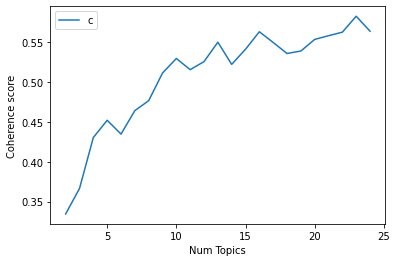

In [19]:
cb_opinions_docs = corpus2docs_1(cb_val_joy_opinions)
cb_opinions_dic = gensim.corpora.Dictionary(cb_opinions_docs)
cb_opinions_vecs = docs2vecs(cb_opinions_docs, cb_opinions_dic)

model_list = []
coherence_values = []
model_topics = []

for num_topics in range(2, 25):
    # lda_gensim = gensim.models.ldamodel.LdaModel(corpus=cb_opinions_vecs, id2word=cb_opinions_dic, num_topics=num_topics, random_state=99, iterations=100)
    lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, iterations=500, corpus=cb_opinions_vecs, num_topics=num_topics, id2word=cb_opinions_dic, random_seed=99)
    coherencemodel = CoherenceModel(model=lda_mallet, texts=cb_opinions_docs, dictionary=cb_opinions_dic, coherence='c_v')
    model_topics.append(num_topics)
    model_list.append(lda_mallet)
    coherence_values.append(coherencemodel.get_coherence())
    # print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))

limit=25; start=2; step=1;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [156]:
# LDA Gensim
# lda_gensim = topics_visualization_gensim(opinions_vecs, opinions_dic, 7, 'circuit_breaker_joy_gensim', 20)
lda_gensim = gensim.models.ldamodel.LdaModel(corpus=vecs, id2word=dic, num_topics=num_topics, random_state=99, iterations=100)

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
# LDA Mallet
lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=cb_opinions_vecs, iterations=500, num_topics=10, id2word=cb_opinions_dic, random_seed=99)

vecTop = lda_mallet.show_topics(num_words=30)
for i in range(0, 10):
    print(vecTop[i])
    print()

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
(0, '0.075*"good" + 0.019*"happy" + 0.017*"test" + 0.016*"control" + 0.016*"period" + 0.015*"covid" + 0.012*"staying" + 0.009*"news" + 0.009*"late" + 0.009*"walk" + 0.008*"move" + 0.008*"approach" + 0.007*"leave" + 0.007*"super" + 0.007*"population" + 0.007*"household" + 0.007*"company" + 0.007*"special" + 0.006*"efforts" + 0.006*"plan" + 0.006*"key" + 0.006*"visitors" + 0.006*"unnecessary" + 0.006*"small" + 0.006*"price" + 0.006*"true" + 0.006*"staff" + 0.006*"play" + 0.006*"crisis" + 0.005*"curve"')

(1, '0.060*"virus" + 0.060*"government" + 0.033*"risk" + 0.026*"masks" + 0.022*"understand" + 0.020*"spread" + 0.01

In [159]:
# Getting pyLDAvis for Mallet
mallet_lda_model= gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda_mallet)

opinions_lda_mallet = topics_visualization_gensim(opinions_vecs, opinions_dic, 10, 'circuit_breaker_joy_mallet', 20)

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Dominant topic for each document

In [28]:
#df_topic_sents_keywords = format_topics_sentences(ldamodel=model_list[1], corpus=sg_vecs, data=sg_docs)
df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_mallet, corpus=cb_opinions_vecs, data=cb_opinions_docs, opinions=cb_val_joy_opinions)

# Format
cb_val_joy_dominant_topic = df_topic_sents_keywords.reset_index()
cb_val_joy_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Processed Text', 'Original Text']
cb_val_joy_dominant_topic.head()

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Processed Text,Original Text
0,0,5.0,0.1870,"home, safe, stay, care, children, distancing, ...","[wrote, need, handle, issues, home, work, pare...",kuma-mon wrote: Because need to handle issues ...
1,1,4.0,0.1329,"mask, make, parents, food, wear, infected, wea...","[retired, parents, wife, keep, asking, help, n...",If your retired parents and wife keep asking y...
2,2,8.0,0.1369,"work, workers, great, allowed, hard, essential...","[electricity, use, lesser, aircon, ok, bills, ...","For electricity, use lesser aircon should be o..."
3,3,0.0,0.1537,"good, happy, test, control, period, covid, sta...","[lucky, company, already, using, virtual, call...","For me, I'm lucky the company already are usin..."
4,4,9.0,0.1293,"day, things, person, family, times, feel, pand...","[way, agree, also, bored, leh, every, day, hom...",In a way I agree But also bored leh every day ...


In [49]:
topics = {}

for i in range(cb_val_joy_dominant_topic['Dominant_Topic'].nunique()):
    topics[f'topic {i}'] = {'Text': [], 'Perc Contrib': []}
    top_text = list(cb_val_joy_dominant_topic[cb_val_joy_dominant_topic['Dominant_Topic'] == i].sort_values(['Topic_Perc_Contrib'], ascending=False)['Original Text'].head())
    top_perc_contrib = list(cb_val_joy_dominant_topic[cb_val_joy_dominant_topic['Dominant_Topic'] == i].sort_values(['Topic_Perc_Contrib'], ascending=False)['Topic_Perc_Contrib'].head())
    for j in range(5):
        topics[f'topic {i}']['Text'].append(top_text[j])
        topics[f'topic {i}']['Perc Contrib'].append(top_perc_contrib[j])

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
topic0 = pd.DataFrame(topics['topic 0'])
topic0

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Text,Perc Contrib
0,I hope all is well in singapore and the bad ne...,0.2110
1,Many countries are adopting the 'wait till the...,0.1935
2,The cautious approach is good if we really wan...,0.1803
3,"Since we are doing something about it, do try ...",0.1792
4,"Happy we all done well in staying at home , s...",0.1724


## Topic Modelling 

In [26]:
dictionary = {
    'joy': {},
    'anger': {}, 
    'sadness': {}, 
    'fear': {}, 
    'neutral': {},
    'positive': {}, 
    'negative': {}
}

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
sequence = ['joy', 'anger', 'sadness', 'fear', 'neutral', 'positive', 'negative']
index = 0

for opinion in opinion_types:
    opi_type = sequence[index]
    opinions_docs = corpus2docs_1(opinion)
    dictionary[opi_type]['opinions_doc'] = opinions_docs
    opinions_dic = gensim.corpora.Dictionary(opinions_docs)
    dictionary[opi_type]['opinions_dic'] = opinions_dic
    opinions_vecs = docs2vecs(opinions_docs, opinions_dic)
    dictionary[opi_type]['opinions_vec'] = opinions_vecs

    model_list = []
    coherence_values = []
    model_topics = []

    for num_topics in range(2, 25):
        # lda_gensim = gensim.models.ldamodel.LdaModel(corpus=cb_opinions_vecs, id2word=cb_opinions_dic, num_topics=num_topics, random_state=99, iterations=100)
        lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, iterations=500, corpus=opinions_vecs, num_topics=num_topics, id2word=opinions_dic, random_seed=99)
        coherencemodel = CoherenceModel(model=lda_mallet, texts=opinions_docs, dictionary=opinions_dic, coherence='c_v')
        model_topics.append(num_topics)
        model_list.append(lda_mallet)
        coherence_values.append(coherencemodel.get_coherence())
        # print("#Topics: " + str(num_topics) + " Score: " + str(coherencemodel.get_coherence()))
    
    dictionary[opi_type]['model_list'] = model_list
    dictionary[opi_type]['coherence_values'] = coherence_values
    dictionary[opi_type]['model_topics'] = model_topics

    index += 1

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
joy
----------


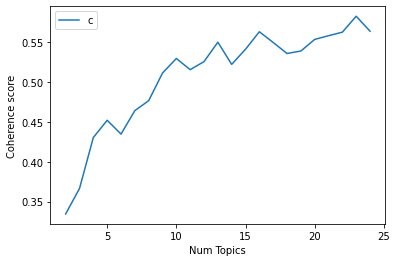

anger
----------


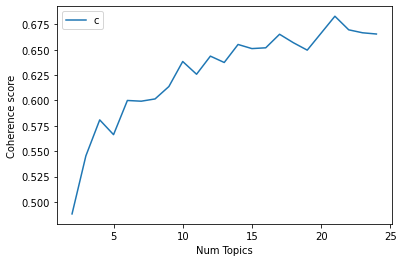

sadness
----------


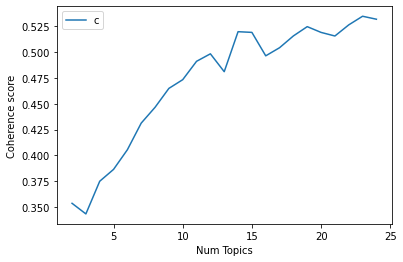

fear
----------


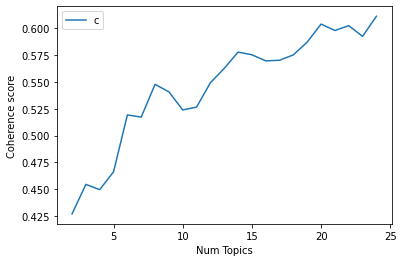

neutral
----------


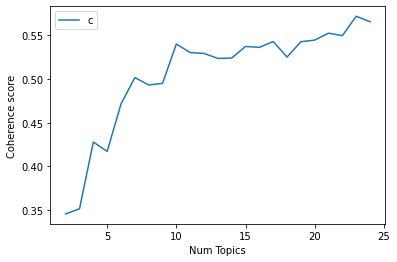

positive
----------


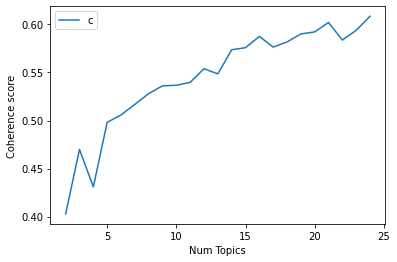

negative
----------


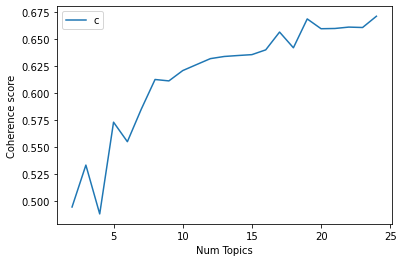

In [31]:
sequence = ['joy', 'anger', 'sadness', 'fear', 'neutral', 'positive', 'negative']

for ele in sequence:
    print(ele)
    print('-'*10)
    coherence_plot(dictionary[ele]['coherence_values'])
    print()
# coherence_plot(dictionary['anger'][coherence_values])
# coherence_plot(dictionary['sadness'][coherence_values])
# coherence_plot(dictionary['fear'][coherence_values])
# coherence_plot(dictionary['neutral'][coherence_values])
# coherence_plot(dictionary['positive'][coherence_values])
# coherence_plot(dictionary['negative'][coherence_values])

In [33]:
sequence = ['joy', 'anger', 'sadness', 'fear', 'neutral', 'positive', 'negative']
no_topics = [10, 10, 10, 10, 10, 10, 10]

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [40]:
for i in range(len(sequence)):
    opi_type = sequence[i]
    lda_mallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=dictionary[opi_type]['opinions_vec'], iterations=500, num_topics=10, id2word=dictionary[opi_type]['opinions_dic'], random_seed=99)
    dictionary[opi_type]['lda_mallet'] = lda_mallet

    mallet_lda_model= gensim.models.wrappers.ldamallet.malletmodel2ldamodel(lda_mallet)
    dictionary[opi_type]['mallet_lda_model'] = mallet_lda_model

    df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_mallet, corpus=dictionary[opi_type]['opinions_vec'], data=dictionary[opi_type]['opinions_doc'], opinions=opinion_types[i])
    dominant_topic = df_topic_sents_keywords.reset_index()
    dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Processed Text', 'Original Text']
    # dominant_topic.head()
    dictionary[opi_type]['dominant_topic'] = dominant_topic

    topics = {}
    for j in range(dominant_topic['Dominant_Topic'].nunique()):
        topics[f'topic {j}'] = {'Text': [], 'Perc Contrib': []}
        top_text = list(dominant_topic[dominant_topic['Dominant_Topic'] == j].sort_values(['Topic_Perc_Contrib'], ascending=False)['Original Text'].head())
        top_perc_contrib = list(dominant_topic[dominant_topic['Dominant_Topic'] == j].sort_values(['Topic_Perc_Contrib'], ascending=False)['Topic_Perc_Contrib'].head())
        for k in range(5):
            topics[f'topic {j}']['Text'].append(top_text[k])
            topics[f'topic {j}']['Perc Contrib'].append(top_perc_contrib[k])
    dictionary[opi_type]['topics_top_sent'] = topics

    print(f'Round {i} is done!')

/Users/chenjianyu/Library/Python/3.9/lib/python/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
Round 0 is done!
Round 1 is done!
Round 2 is done!
Round 3 is done!
Round 4 is done!
Round 5 is done!
Round 6 is done!
